In [1]:
import pandas as pd

df = pd.read_csv("/content/pca_dataset.csv")

df.head()
# dataset contains 5 features, we will reduce the dimensionality using PCA

,feature_1,feature_2,feature_3,feature_4,feature_5
0,37.454012,95.071431,73.199394,59.865848,15.601864
1,15.599452,5.808361,86.617615,60.111501,70.807258
2,2.058449,96.990985,83.244264,21.233911,18.182497
3,18.340451,30.424224,52.475643,43.194502,29.122914
4,61.185289,13.949386,29.214465,36.636184,45.606998


In [2]:
# first, we need to perform scaling on the features
from sklearn.preprocessing import StandardScaler

features = df.columns
X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Principal Component Analysis (PCA) – Overview

**Purpose:**  
PCA is a **dimensionality reduction technique**. It simplifies complex datasets by reducing the number of features while retaining as much important information (variance) as possible.

---

## How PCA Works (Step by Step)

1. **Standardize the Data**  
   Features may have different scales (e.g., height in cm vs. weight in kg). Standardization ensures each feature contributes equally to the analysis.

2. **Compute the Covariance Matrix**  
   This matrix shows how features vary together. Features that change together strongly indicate redundancy.

3. **Compute Eigenvectors and Eigenvalues**  
   - **Eigenvectors** = directions of maximum variance (principal components).  
   - **Eigenvalues** = how much variance is along each eigenvector.  
   The bigger the eigenvalue, the more “information” that component carries.

4. **Select Principal Components**  
   Choose the top components that explain most of the variance (e.g., 2 components might explain 90% of variance).

5. **Project Data onto the Principal Components**  
   Transform your original dataset into a new set of axes (principal components). This gives a **reduced feature set** while keeping most of the original information.

---

## Why PCA is Useful
- Reduces computational cost for large datasets.
- Removes noise and redundancy.
- Makes data easier to visualize (2D or 3D plots).
- Can improve performance of machine learning models by reducing overfitting.

---

## Key Intuition
Think of PCA as **rotating the coordinate system** to find the axes along which your data stretches the most. Those axes capture the “essence” of your dataset.


In [3]:
# now, let's create our PCA model
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # let's reduce dimensionality to 2 for visualization

X_pca = pca.fit_transform(X_scaled)
X_pca.shape # we now have 2 dimensions rather than 5

(1000, 2)

In [4]:
# let's check the explained variance ratio
pca.explained_variance_ratio_

# we are only maintaining about 41% of the original data using 2 components rather than the original 5

array([0.21658208, 0.2050885 ])

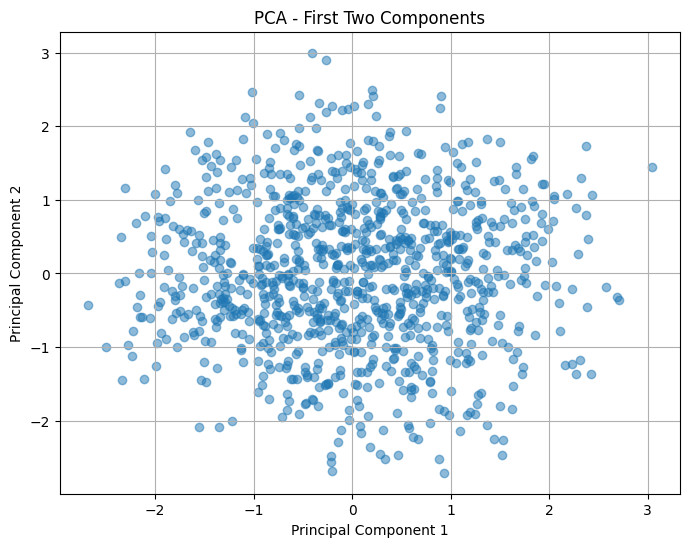

In [5]:
# next, let's plot a scatter plot using our 2 principal components
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - First Two Components")
plt.grid(True)
plt.show()
# each axis is a linear combination of the original features
# points that are close together are more similar across the original 5 features
# we captured about 41% of the total variance with our 2 principal components, so this plot shows the "most important" 41% of the data

In [6]:
# let's take it one step further and apply K-Means on our PCA-transformed data and visualize the results
from sklearn.cluster import KMeans

# let's initialize k-means with 3 clusters just as an example
kmeans = KMeans(n_clusters=3, random_state=1)
labels = kmeans.fit_predict(X_pca)

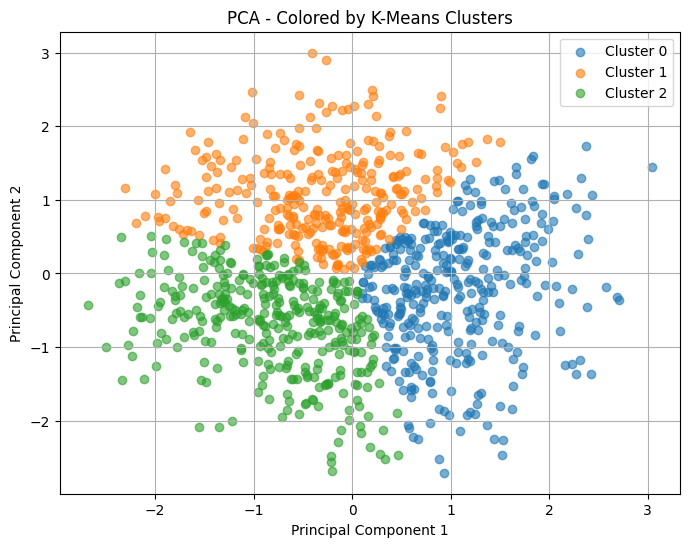

In [7]:
# now, let's visualize the clusters on the PCA scatter plot
plt.figure(figsize=(8,6))
for cluster in range(3):
  plt.scatter(
      X_pca[labels == cluster, 0],
      X_pca[labels == cluster, 1],
      label=f'Cluster {cluster}',
      alpha=0.6
  )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Colored by K-Means Clusters')
plt.legend()
plt.grid(True)
plt.show()

# each color represents a cluster detected by k-means and the clusters are very well separated after performing PCA
# PCA helps us visualize cluster separation in 2D despite the original data having 5 dimensions